Популярный сервис аренды самокатов GoFast передал данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируем данные и проверим некоторые гипотезы, которые могут помочь бизнесу вырасти. Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.

Сервисом можно пользоваться:

без подписки:
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей.

с подпиской Ultra:
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import factorial
from math import sqrt
from scipy import stats as st
from scipy.stats import binom, norm

#### Шаг 1. Загрузка данных

1.1 Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы. 

In [2]:
users_go = pd.read_csv('/datasets/users_go.csv') # Пользователи
rides_go = pd.read_csv('/datasets/rides_go.csv') # Поездки
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv') # Подписки

1.2 Выведем первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме.

In [3]:
users_go.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
users_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
rides_go.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
subscriptions_go.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


#### Шаг 2. Предобработка данных

2.1 Приведем столбец date к типу даты pandas.

In [9]:
rides_go['date'] = pd.to_datetime(
    rides_go['date'], format='%Y-%m-%d'
)

In [10]:
rides_go.info() # Проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


2.2 Создим новый столбец с номером месяца на основе столбца date.

In [11]:
rides_go['date'].sort_values().unique()

array(['2021-01-01T00:00:00.000000000', '2021-01-02T00:00:00.000000000',
       '2021-01-03T00:00:00.000000000', '2021-01-04T00:00:00.000000000',
       '2021-01-05T00:00:00.000000000', '2021-01-06T00:00:00.000000000',
       '2021-01-07T00:00:00.000000000', '2021-01-08T00:00:00.000000000',
       '2021-01-09T00:00:00.000000000', '2021-01-10T00:00:00.000000000',
       '2021-01-11T00:00:00.000000000', '2021-01-12T00:00:00.000000000',
       '2021-01-13T00:00:00.000000000', '2021-01-14T00:00:00.000000000',
       '2021-01-15T00:00:00.000000000', '2021-01-16T00:00:00.000000000',
       '2021-01-17T00:00:00.000000000', '2021-01-18T00:00:00.000000000',
       '2021-01-19T00:00:00.000000000', '2021-01-20T00:00:00.000000000',
       '2021-01-21T00:00:00.000000000', '2021-01-22T00:00:00.000000000',
       '2021-01-23T00:00:00.000000000', '2021-01-24T00:00:00.000000000',
       '2021-01-25T00:00:00.000000000', '2021-01-26T00:00:00.000000000',
       '2021-01-27T00:00:00.000000000', '2021-01-28

Значения только за 2021 год

In [12]:
# Комментарий ревьюера 2
rides_go['date'].dt.year.unique()

array([2021])

In [13]:
rides_go['month'] = pd.DatetimeIndex(rides_go['date']).month

In [14]:
rides_go.head() # Проверка

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


2.3 Проверим наличие пропущенных значений и дубликатов в датафреймах. Обработаем их, если такие значения присутствуют.

In [15]:
users_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [16]:
rides_go.isna().sum() 

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [17]:
subscriptions_go.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропущенных значений нет.

Проверим наличие дубликатов:

In [18]:
users_go.duplicated().sum() 

31

In [19]:
users_go = users_go.drop_duplicates() # Удаляем дубликаты 

In [20]:
rides_go.duplicated().sum() 

0

In [21]:
subscriptions_go.duplicated().sum() 

0

Выводы:
    
Считали CSV-файлы с данными с помощью библиотеки pandas и сохранили их в датафреймы.

Изучили общую информацию о каждом датафрейме.

Провели предобработку данных, а именно:
- привели столбец date к типу даты pandas;
- создали новый столбец с номером месяца на основе столбца date;
- проверили наличие пропущенных значений и дубликатов в датафреймах, удалили дубликаты. 

In [22]:
temp = rides_go.copy() # Создаем копию, что бы не изменять текущий датасет
display(temp['distance'].head(3))
# Округление расстояния
temp['distance'] = temp['distance'].round(2)
temp['distance'].head(3)

0    4409.919140
1    2617.592153
2     754.159807
Name: distance, dtype: float64

0    4409.92
1    2617.59
2     754.16
Name: distance, dtype: float64

#### Шаг 3. Исследовательский анализ данных

Опишем и визуализуем общую информацию о пользователях и поездках:

3.1 Частота встречаемости городов:

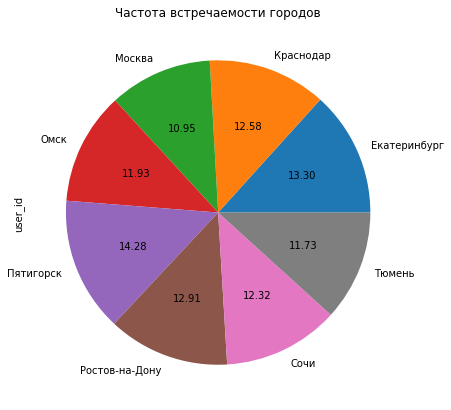

In [23]:
users_go.pivot_table(index='city',values='user_id',aggfunc='count') \
  .plot.pie(y='user_id', figsize=(10,7), autopct='%.2f')

plt.legend("", frameon=False)
plt.title('Частота встречаемости городов')
plt.show()

In [24]:
users_go.groupby('city')['user_id'].sum().sort_values()

city
Москва            125326
Омск              132970
Тюмень            139953
Сочи              146432
Ростов-на-Дону    148577
Краснодар         155476
Екатеринбург      158621
Пятигорск         169990
Name: user_id, dtype: int64

Выводы:

Больше всего самокатами пользуются в Пятигорске

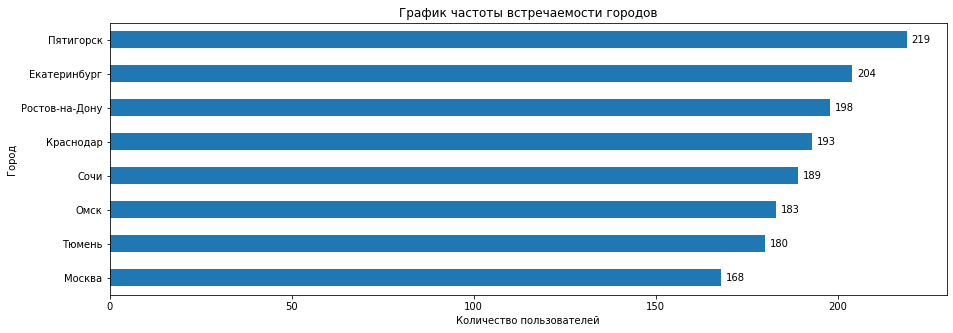

In [25]:
# Создаем копию датасета, что бы не работать с исходным
tmp = users_go.copy()

# Построение горизонтальной диаграммы
ax = tmp['city'].value_counts(ascending=True).plot(
    kind='barh',
    figsize=(15, 5),
    title='График частоты встречаемости городов'
)

# Добавление значений рядом со столбцами
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

# Добавление меток осей
plt.xlabel('Количество пользователей')
plt.ylabel('Город')

# Отображение графика
plt.show()

3.2 Соотношение пользователей с подпиской и без подписки:

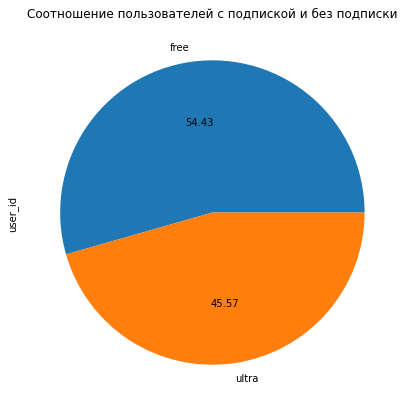

In [26]:
users_go.pivot_table(index='subscription_type',values='user_id',aggfunc='count') \
  .plot.pie(y='user_id', figsize=(10,7), autopct='%.2f')

plt.legend("", frameon=False)
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.show()

Выводы:

Больше клиентов без подписки

3.3 Возраст пользователей:

In [27]:
users_go['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

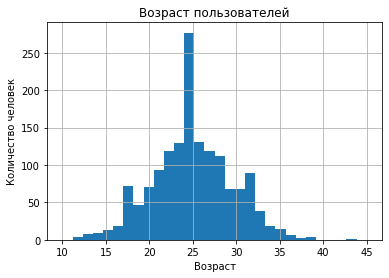

In [28]:
users_go['age'].hist(bins=30, range=(10, 45))

plt.title('Возраст пользователей')
plt.ylabel('Количество человек')
plt.xlabel('Возраст')
plt.show()

Чаще всего сервисом аренды самокатов GoFast пользуются люди возрастом 25 лет. Среди пользователей некоторым менее 18 лет, именно с этого возраста разрешен прокат самокатов. В некоторых компаниях и регионах разрешено с 14 лет, но при письменном согласии родителей. В датасете минимальный возраст 12 лет, это явное нарушение существующих норм.

3.4 Расстояние, которое пользователь преодолел за одну поездку:

In [29]:
rides_go['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

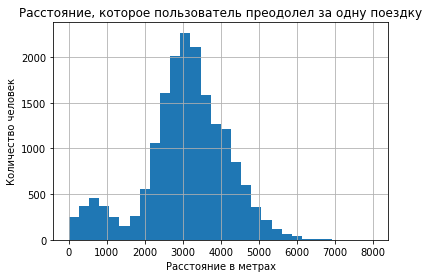

In [30]:
rides_go['distance'].hist(bins=30, range=(0, 8000))

plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество человек')
plt.show()

Чаще всего дистанция поездки на самокате составляет 3км. На графике прослеживается наличие двух локальных максимумов на коротких (500м.) и длинных (3км.) расстояниях поездок.

3.5 Продолжительность поездок:

In [31]:
rides_go['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

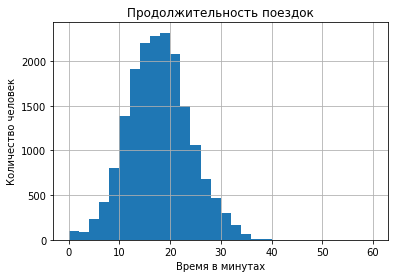

In [32]:
rides_go['duration'].hist(bins=30, range=(0, 60))

plt.title('Продолжительность поездок')
plt.xlabel('Время в минутах')
plt.ylabel('Количество человек')
plt.show()

Чаще всего длительность поездок составляет 15-25 минут. Есть аномалия с поездками длительностью менее 1 минуты.
Не смотря на такую низкую продолжительность поездки, эти данные удалять не рекомендуется, так как в дальнейшем производится расчет выручки, которая определяет финансовый результат Сервиса аранды самокатов.

Выводы исследовательского анализа данных:
    
- Больше всего самокатами пользуются в Пятигорске;
- Больше клиентов без подписки;
- Чаще всего сервисом аренды самокатов GoFast пользуются люди возрастом 25 лет;
- На графике прослеживается наличие двух локальных максимумов на коротких (500м.) и длинных (3км.) расстояниях поездок.;    
- Чаще всего длительность поездок составляет 15-25 минут. 

#### Шаг 4. Объединение данных

4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуемся методом merge().

In [33]:
data = pd.merge(pd.merge(users_go, rides_go, on='user_id', how='outer'), subscriptions_go, on='subscription_type', how='outer')
data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [34]:
data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


4.2 Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:

•	c данными о пользователях без подписки;

•	с данными о пользователях с подпиской.


In [36]:
user_free = data[data['subscription_type'] == 'free']
user_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [37]:
user_ultra = data[data['subscription_type'] == 'ultra']
user_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

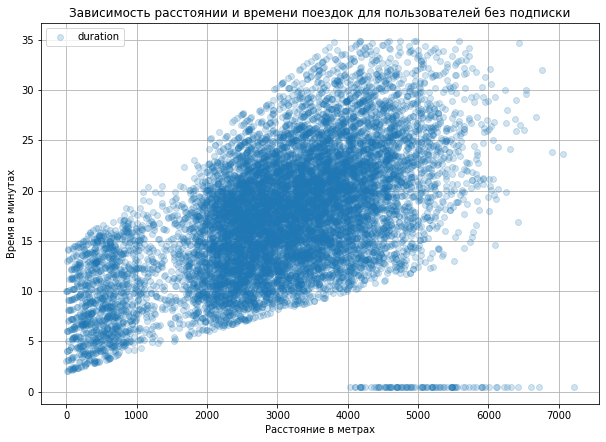

In [38]:
user_free.pivot_table(index='distance', values='duration') \
  .plot(y='duration', figsize=(10,7), style='o', alpha=0.2, grid=True)

plt.title('Зависимость расстоянии и времени поездок для пользователей без подписки')
plt.ylabel('Время в минутах')
plt.xlabel('Расстояние в метрах')
plt.show()

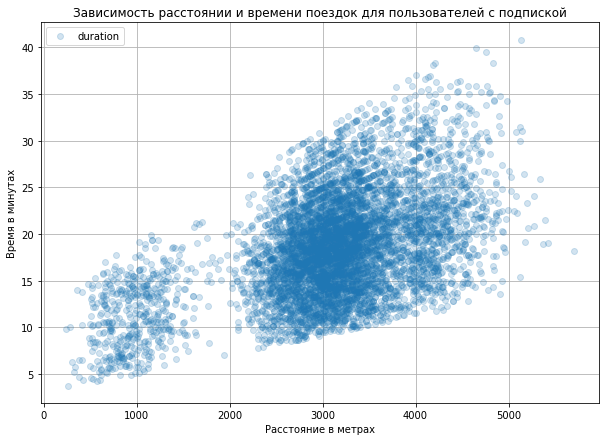

In [39]:
user_ultra.pivot_table(index='distance', values='duration') \
  .plot(y='duration', figsize=(10,7), style='o', alpha=0.2, grid=True)

plt.title('Зависимость расстоянии и времени поездок для пользователей c подпиской')
plt.ylabel('Время в минутах')
plt.xlabel('Расстояние в метрах')
plt.show()

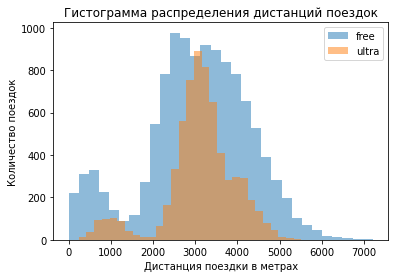

In [40]:
plt.hist(user_free['distance'], alpha=0.5, label= 'duration', bins=30)
plt.hist(user_ultra['distance'], alpha=0.5, label= 'duration', bins=30)

# Добавляем легенду и выводим график на экран
plt.legend(['free', 'ultra'])
plt.title('Гистограмма распределения дистанций поездок')
plt.ylabel('Количество поездок')
plt.xlabel('Дистанция поездки в метрах')
plt.show()

Выводы:
    
- На гистограмме распределения дистанций поездок прослеживается для пользователей без подписки наличие трех локальных максимумов 500м, 2.5км и 3,2км;
- На гистограмме распределения дистанций поездок прослеживается для пользователей с подпиской наличие двух локальных максимумов 1км и 3км;
- На гистограмме распределения продолжительности поездок прослеживается для пользователей без подписки наличие двух локальных максимумов 2 минуты и 18 минут;
- На гистограмме распределения продолжительности поездок для пользователей с подпиской локальный максимум 18 минут.

Промежуточные выводы по визуализации информации о расстоянии и времени поездок для пользователей обеих категорий:
    

- Объединены данные о пользователях, поездках и подписках в один датафрейм;
- Созданы ещё два датафрейма: c данными о пользователях без подписки, с данными о пользователях с подпиской;
- Визуализирована информация о расстоянии и времени поездок для пользователей обеих категорий;

#### Шаг 5. Подсчёт выручки

5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [42]:
data['duration'] = np.ceil(data['duration']) 

In [43]:
agg_data = pd.pivot_table(data,
                           index=['month', 'user_id'],
                           values = ['distance', 'duration', 'name', 'subscription_type'],
                           aggfunc = {'distance': sum, 
                                      'duration' : sum, 
                                      'user_id' : len, 
                                      'subscription_type' : min})

In [44]:
agg_data

distance  duration subscription_type  user_id
month user_id                                                  
1     1        7027.511294      42.0             ultra        2
      3        3061.777147      13.0             ultra        1
      5        3914.646990      13.0             ultra        1
      7        6478.080979      28.0             ultra        2
      12       3577.151148      33.0             ultra        1
...                    ...       ...               ...      ...
12    1525     4597.854350      34.0              free        1
      1526     3644.121544      23.0              free        1
      1528     3998.569324      11.0              free        1
      1532     6111.889853      42.0              free        2
      1534     2371.711192      16.0              free        1

[11331 rows x 4 columns]

In [45]:
agg_data.rename(columns = {'user_id' : 'count_trips'}, inplace = True)

5.2 В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа.

In [46]:
def revenue(row):
    if row['subscription_type'] == 'ultra':
        return ((6 * row['duration']) + 199)
    else: 
        return ((50 * row['count_trips']) + (8 * row['duration'])) 
   
        

In [47]:
agg_data['monthly_revenue'] = agg_data.apply(revenue, axis=1)
agg_data

distance  duration subscription_type  count_trips  \
month user_id                                                         
1     1        7027.511294      42.0             ultra            2   
      3        3061.777147      13.0             ultra            1   
      5        3914.646990      13.0             ultra            1   
      7        6478.080979      28.0             ultra            2   
      12       3577.151148      33.0             ultra            1   
...                    ...       ...               ...          ...   
12    1525     4597.854350      34.0              free            1   
      1526     3644.121544      23.0              free            1   
      1528     3998.569324      11.0              free            1   
      1532     6111.889853      42.0              free            2   
      1534     2371.711192      16.0              free            1   

               monthly_revenue  
month user_id                   
1     1                  451.0  
      3                  277.0  
      5                  277.0  
      7                  367.0  
      12                 397.0  
...                        ...  
12    1525               322.0  
      1526               234.0  
      1528               138.0  
      1532               436.0  
      1534               178.0  

[11331 rows x 5 columns]

In [48]:
# Комментарий ревьюера
# Контроль суммы выручки
tmp, col_rev = agg_data.copy(), 'monthly_revenue'
print("Правильное значение суммы выручки 3878641, сумма выручки расчитанная в таблице:", tmp[col_rev].sum())

Правильное значение суммы выручки 3878641, сумма выручки расчитанная в таблице: 3878641.0


In [49]:
print('Сумма ежемесячной выручки :', agg_data['monthly_revenue'].sum())

Сумма ежемесячной выручки : 3878641.0


#### Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.


Проверяем гипотезу:

H0: Время (duration) пользователей на подписке ultra = время (duration) пользователей на подписке free

H1: Время (duration) пользователей на подписке ultra > время (duration) пользователей на подписке free

гипотеза правосторонняя

In [50]:
ultra = user_ultra['duration'] 

free = user_free['duration']

results = st.ttest_ind(ultra, 
                       free,
                       alternative = 'greater')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


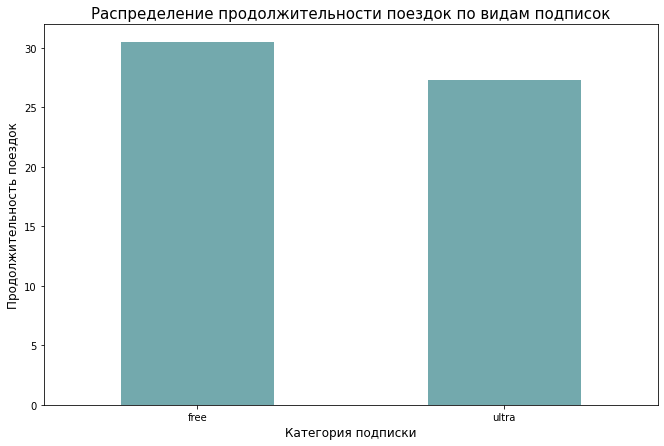

In [51]:
agg_data.groupby('subscription_type')['duration'].mean().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0) 
plt.title('Распределение продолжительности поездок по видам подписок', size=15)
plt.xlabel('Категория подписки', size=12)
plt.ylabel('Продолжительность поездок', size=12)

plt.show()

Проверили гипотезу и отвергли гипотезу о том, что время поездки пользователей на тарифе ultra равно времени поездки пользователей на тарифе free.

Исследовали данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу и сделаем выводы.

Проверяем гипотезу:

H0: Расстояние (distance) пользователей на подписке ultra = 3130 метров

H1: Расстояние (distance) пользователей на подписке ultra > 3130 метров

In [52]:
ultra = user_ultra['distance'] 

value = 3130 # оптимальное расстояние одной поездки с точки зрения износа самоката

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(
    ultra, 
    value,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


Проверили гипотезу и пришли к выводу: мы не можем утверждать, что расстояние, которое проехали пользователи на тарифе ultra, не превышает 3130 метров.

Вывод:
    
- нельзя утверждать, что пользователи тарифа ultra меньше изнашивают самокат 
- так как нельзя утверждать, что расстояние, которое проезжают пользователи тарифа ultra за одну поездку, не превышает 3130 метров

6.3 Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Проверяем гипотезу:

Н0 = помесячная выручка от пользователей с подпиской и без подписки равна 

Н1 = помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки

гипотеза правосторонняя

In [53]:
ultra_monthly_revenue = agg_data.loc[agg_data.subscription_type == 'ultra', 'monthly_revenue'] 

free_monthly_revenue = agg_data.loc[agg_data.subscription_type == 'free', 'monthly_revenue'] 

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(ultra_monthly_revenue, 
                       free_monthly_revenue,
                       alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Проверили гипотезу и пришли к выводу: мы можем утверждать, что помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки

6.4 Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест нам понадобился бы для проверки этой гипотезы?

Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python, применим метод scipy.stats.ttest_rel().


Гипотезы в таком случае будут сформулированы так:

H0: μ1 = μ2 количество обращений в техподдержку до обновления и после него равны
 
H1: μ2 < μ1  количество обращений в техподдержку после обновления меньше, чем до обновления


где μ1  и μ2  — средние значения до и после изменения.

#### Шаг 7. Распределения

7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Нужно проверить можем ли мы использовать аппроксимацию биномиального распределения нормальным

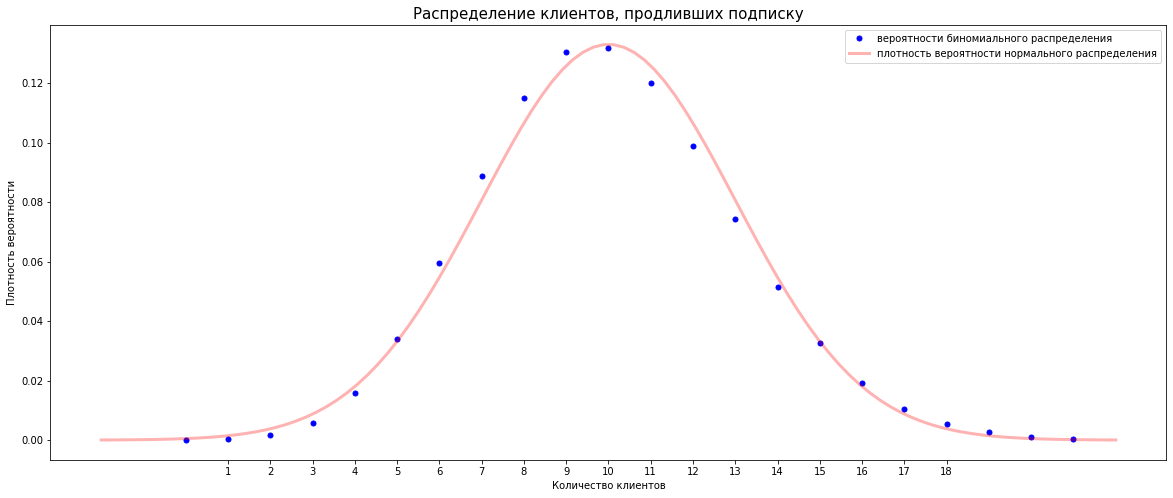

Условие выполняется


In [54]:
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result
 
# задаём параметры биномиального распределения
n = 100
p = 0.1

left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))
 

x = list(range(max(0, left), right))
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5,
	      label='вероятности биномиального распределения')


mu = n * p
sigma = sqrt(n * p * (1 - p))
 
x = linspace(left, right, 100)
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3, label='плотность вероятности нормального распределения')
 
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 1))
ax.set_xticks(x_ticks)

ax.legend(loc='best')
plt.title('Распределение клиентов, продливших подписку', size=15)
plt.ylabel('Плотность вероятности')
plt.xlabel('Количество клиентов')
plt.show()


if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Условие выполняется')
else:
    print('Условие не выполняется')  

Форма биномиального распределения симметрична и близка к нормальному распределению.

Аппроксимация нормальным распределением и применение метода cdf():

In [55]:
p = 0.1
n = 800

for n in range(800, 1800):
    if binom.cdf(99, n, p) <= 0.05:
        print ("Минимальное количество промокодов: ", n)

Минимальное количество промокодов:  1161
Минимальное количество промокодов:  1162
Минимальное количество промокодов:  1163
Минимальное количество промокодов:  1164
Минимальное количество промокодов:  1165
Минимальное количество промокодов:  1166
Минимальное количество промокодов:  1167
Минимальное количество промокодов:  1168
Минимальное количество промокодов:  1169
Минимальное количество промокодов:  1170
Минимальное количество промокодов:  1171
Минимальное количество промокодов:  1172
Минимальное количество промокодов:  1173
Минимальное количество промокодов:  1174
Минимальное количество промокодов:  1175
Минимальное количество промокодов:  1176
Минимальное количество промокодов:  1177
Минимальное количество промокодов:  1178
Минимальное количество промокодов:  1179
Минимальное количество промокодов:  1180
Минимальное количество промокодов:  1181
Минимальное количество промокодов:  1182
Минимальное количество промокодов:  1183
Минимальное количество промокодов:  1184
Минимальное коли

7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [56]:
# задаём параметры биномиального распределения
n = 1000000
p = 0.4

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 399,5 тысяч
result = distr.cdf(399500)
print(result)

0.15371708296369768


Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей около 15%

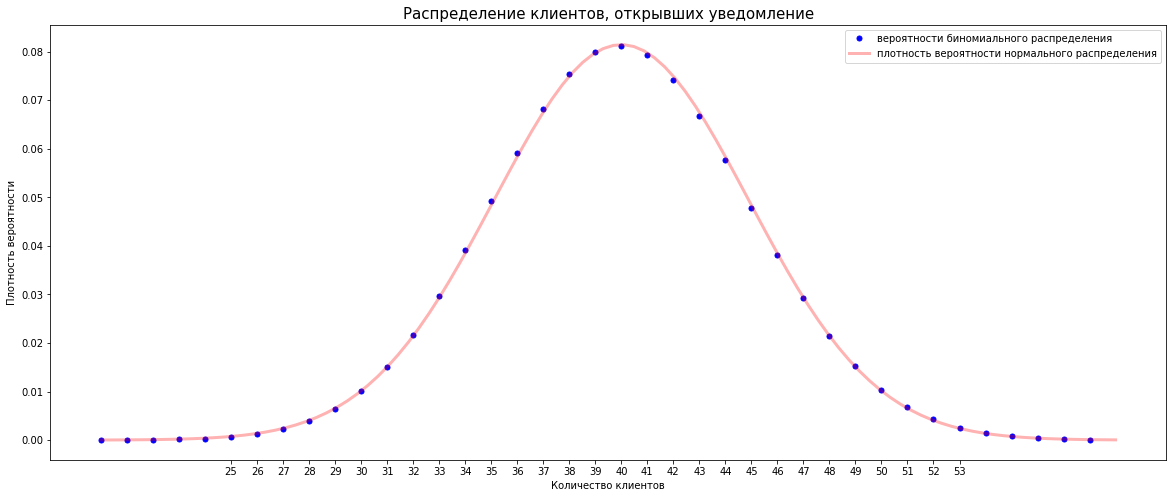

In [57]:
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result
 
n = 100
p = 0.4

left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))
 
x = list(range(max(0, left), right))
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5,
	      label='вероятности биномиального распределения')

mu = n * p
sigma = sqrt(n * p * (1 - p))
 
x = linspace(left, right, 100)
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3, label='плотность вероятности нормального распределения')
 
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 1))
ax.set_xticks(x_ticks)

ax.legend(loc='best')
plt.title('Распределение клиентов, открывших уведомление', size=15)
plt.ylabel('Плотность вероятности')
plt.xlabel('Количество клиентов')
plt.show()

Краткое описание целей и задач проекта:

   
Сервис аренды самокатов GoFast передал данные о некоторых пользователях из нескольких городов, а также об их поездках. 
    
- Цель: помочь бизнесу вырасти
    
- Задачи: проанализировать данные и проверить некоторые гипотезы.


Основные результаты, полученные в ходе выполнения проекта:

В ходе анализа данных выяснили, что:
    
- Больше всего самокатами пользуются в Пятигорске;

- Больше клиентов без подписки;

- Чаще всего сервисом аренды самокатов GoFast пользуются люди возрастом 25 лет;

- Дистанция поездок чаще всего составляет 500м и 3км;  

- Чаще всего длительность поездок составляет 15-25 минут.
    
- Посчитали сумму ежемесячной выручки: 3 878 641 руб
    
- Проверили и отвергли гипотезу о том, что время поездки пользователей на тарифе ultra равно времени поездки пользователей на тарифе free.
    
- Проверили гипотезу и пришли к выводу: мы не можем утверждать, что расстояние, которое проехали пользователи на тарифе ultra, не превышает 3130 метров.
    
- Проверили гипотезу и пришли к выводу: мы можем утверждать, что помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки
    
    
Анализ всех разделов проекта, включая раздел анализа и предобработки данных, и их влияния на общие результаты:
    
1. Загрузка данных: получили данные и изучили общую информацию;
    
2. Предобработка данных: изменен тип данных в столбце date, создан новый столбец с месяцами, проверили наличие пропущенных значений и дубликатов в датафреймах, удалены дубликаты;
    
3. Исследовательский анализ данных: описали и визуализировали общую информацию о пользователях и поездках;
    
4. Объединили данные и визуализировали информацию о расстоянии и времени поездок для пользователей категорий с подпиской и без;
    
5. Посчитали выручку;
    
6. Проверили гипотезы.
    
    
Возможные направления дальнейшего развития и применения полученных результатов:

Стремится к увеличению пользователей с подпиской
